In [98]:
import tensorflow

In [99]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Flatten,Lambda

In [100]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [102]:
img_size=[224,224]
train_dataset='train/'
test_dataset='test/'

In [103]:
network=tensorflow.keras.applications.InceptionV3(input_shape=img_size+[3],weights='imagenet',include_top=False)

In [104]:
for layer in network.layers:
    layer.trainable=False

In [105]:
folders=glob('train/*')

In [106]:
len(folders)

4

In [107]:
x=Flatten()(network.output)

In [108]:
prediction=Dense(len(folders),activation='softmax')(x)

In [109]:
model=Model(inputs=network.input,outputs=prediction)

In [110]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [111]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [113]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [114]:
training_set=train_datagen.flow_from_directory('train/',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [115]:
test_set=test_datagen.flow_from_directory('test/',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 18 images belonging to 4 classes.


In [120]:
mod=model.fit_generator(training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 82s 1s/step - loss: 2.0902 - accuracy: 0.7873 - val_loss: 0.7774 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 78s 1s/step - loss: 0.6300 - accuracy: 0.8903 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 88s 1s/step - loss: 0.4043 - accuracy: 0.9231 - val_loss: 0.3210 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 96s 2s/step - loss: 0.8610 - accuracy: 0.8826 - val_loss: 1.4045 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 91s 1s/step - loss: 0.5665 - accuracy: 0.9103 - val_loss: 0.1888 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 74s 1s/step - loss: 0.5118 - accuracy: 0.9252 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 71s 1s/step - loss: 0.4718 - accuracy: 0.9390 - val_loss: 0.9938 - val_accuracy: 0.8889
Epoch 8/20
61/61 [==

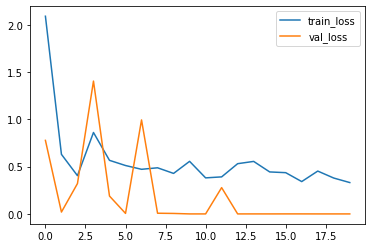

In [121]:
plt.plot(mod.history['loss'],label='train_loss')
plt.plot(mod.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

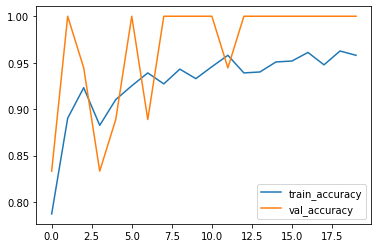

In [122]:
plt.plot(mod.history['accuracy'],label='train_accuracy')
plt.plot(mod.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [123]:

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [124]:
ypred=model.predict(test_set)

In [126]:
ypred

array([2, 3, 2, 2, 2, 1, 1, 3, 2, 1, 0, 1, 3, 3, 0, 1, 3, 0], dtype=int64)

In [125]:
ypred=np.argmax(ypred,axis=1)

In [127]:
ypred

array([2, 3, 2, 2, 2, 1, 1, 3, 2, 1, 0, 1, 3, 3, 0, 1, 3, 0], dtype=int64)

In [153]:
#testing with a custom image
img=image.load_img('dis_leaf (149)_iaip.jpg')

In [154]:
x=image.img_to_array(img)

In [155]:
x

array([[[ 78.,  73.,  53.],
        [ 86.,  81.,  61.],
        [ 94.,  89.,  69.],
        ...,
        [190., 231., 103.],
        [188., 234.,  99.],
        [192., 240., 102.]],

       [[ 96.,  91.,  71.],
        [ 91.,  86.,  66.],
        [ 90.,  85.,  65.],
        ...,
        [192., 232., 117.],
        [189., 233., 110.],
        [184., 233., 105.]],

       [[105., 100.,  78.],
        [ 93.,  88.,  66.],
        [ 86.,  81.,  59.],
        ...,
        [113., 153.,  56.],
        [116., 161.,  56.],
        [112., 160.,  50.]],

       ...,

       [[112., 209.,  68.],
        [117., 212.,  68.],
        [122., 215.,  65.],
        ...,
        [207., 190., 146.],
        [155., 138.,  94.],
        [131., 116.,  73.]],

       [[113., 209.,  73.],
        [122., 217.,  75.],
        [122., 214.,  67.],
        ...,
        [233., 215., 169.],
        [171., 154., 108.],
        [141., 124.,  78.]],

       [[114., 210.,  76.],
        [125., 219.,  79.],
        [121., 2

In [156]:
x.shape

(224, 224, 3)

In [157]:
x=x/255

In [158]:
x

array([[[0.30588236, 0.28627452, 0.20784314],
        [0.3372549 , 0.31764707, 0.23921569],
        [0.36862746, 0.34901962, 0.27058825],
        ...,
        [0.74509805, 0.90588236, 0.40392157],
        [0.7372549 , 0.91764706, 0.3882353 ],
        [0.7529412 , 0.9411765 , 0.4       ]],

       [[0.3764706 , 0.35686275, 0.2784314 ],
        [0.35686275, 0.3372549 , 0.25882354],
        [0.3529412 , 0.33333334, 0.25490198],
        ...,
        [0.7529412 , 0.9098039 , 0.45882353],
        [0.7411765 , 0.9137255 , 0.43137255],
        [0.72156864, 0.9137255 , 0.4117647 ]],

       [[0.4117647 , 0.39215687, 0.30588236],
        [0.3647059 , 0.34509805, 0.25882354],
        [0.3372549 , 0.31764707, 0.23137255],
        ...,
        [0.44313726, 0.6       , 0.21960784],
        [0.45490196, 0.6313726 , 0.21960784],
        [0.4392157 , 0.627451  , 0.19607843]],

       ...,

       [[0.4392157 , 0.81960785, 0.26666668],
        [0.45882353, 0.83137256, 0.26666668],
        [0.47843137, 0

In [159]:
x.shape

(224, 224, 3)

In [160]:
x=np.expand_dims(x,axis=0)

In [161]:
x.shape

(1, 224, 224, 3)

In [162]:
img_data=preprocess_input(x)

In [163]:
model.predict(img_data)

array([[9.5965254e-01, 3.1851775e-07, 1.4529264e-05, 4.0332582e-02]],
      dtype=float32)

In [164]:
leaf=np.argmax(model.predict(img_data),axis=1)

In [165]:
leaf

array([0], dtype=int64)